In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json

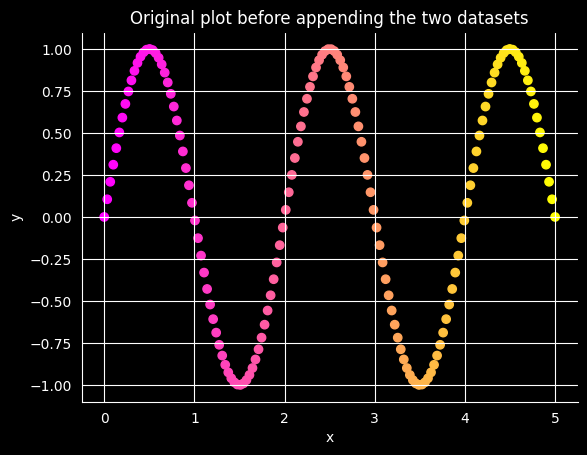

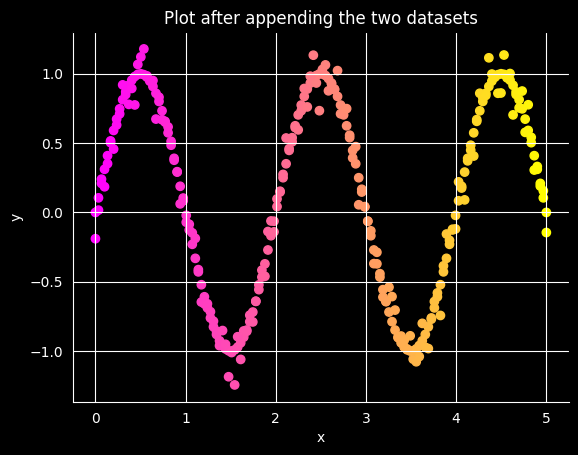

In [3]:
class generate():
    ''' Initialization of the class '''
    def __init__(self, points, noise):
        self.points = points
        self.noise = np.random.randn(self.points)*noise
        self.x = np.linspace(0, 5, self.points)
        self.y = np.sin(np.pi*self.x)

    def generate_data(self):
        ''' Generate data with noise '''
        y = self.y + self.noise
        return y

    def plot(self):
        ''' Plot the data '''
        color = cm.spring(np.linspace(0, 1, self.points))
        plt.scatter(self.x, self.y, c=color)
        plt.title('Original plot before appending the two datasets', c='white')
        plt.xlabel('x', c='white')
        plt.ylabel('y', c='white')
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')
        plt.xticks(color='white')
        plt.yticks(color='white')
        ax = plt.gca()
        ax.spines['left'].set_color('white')
        ax.spines['bottom'].set_color('white')
        plt.grid(color='white')
        plt.savefig('../data/plot_1.png', dpi=200)
        plt.show()

    def data2d(self):
        ''' Creates two datasets in 2d.
            Here 'zip' pairs each value of x with each value of y'''
        xy = list(zip(self.x, self.y))
        xy_noise_truth = list(zip(self.x, self.generate_data()))
        return xy, xy_noise_truth
    
    def append(self):
        ''' Append the data '''
        xy, xy_noise_truth = self.data2d()
        appended_2d = np.append(xy, xy_noise_truth, axis=0)
        return appended_2d
    
    def plot_new_data(self):
        appended_2d = self.append()
        color = cm.spring(np.linspace(0, 1, self.points))
        plt.scatter(appended_2d[:150,0], appended_2d[:150,1], c=color)
        plt.scatter(appended_2d[150:,0], appended_2d[150:,1], c=color)
        plt.title('Plot after appending the two datasets', color='white')
        plt.xlabel('x', c='white')
        plt.ylabel('y', c='white')
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')
        plt.xticks(color='white')
        plt.yticks(color='white')
        ax = plt.gca()
        ax.spines['left'].set_color('white')
        ax.spines['bottom'].set_color('white')
        plt.grid(color='white')
        plt.savefig('../data/plot_2.png', dpi=200)
        plt.show()

    def save_metadata(self):
        appended_2d = self.append()
        metadata = {
                'plot': 'plot_2.png',
                'points': len(appended_2d),
                'noise': list(self.noise),
            }
        with open('../data/metadata_plot_2.json', 'w') as f:
            json.dump(metadata, f, indent=4)

data = generate(150, 0.1)

data.plot()

# xy, xy_noise_truth = data.data2d()

# xy = np.array(xy)
# xy_noise_truth = np.array(xy_noise_truth)

# appended_2d = data.append()

data.plot_new_data()

data.save_metadata()
